In [34]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [35]:
import tensorflow as tf
import tensorflow.keras as keras

In [36]:
import os

data_path='dataset'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'with mask': 0, 'without mask': 1}

In [37]:
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [38]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [39]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [41]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [42]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=15,
  callbacks=[checkpoint],
  validation_split=0.2)


Train on 990 samples, validate on 248 samples
Epoch 1/15
990/990 [==============================] - 15s 15ms/sample - loss: 0.1359 - acc: 0.9545 - val_loss: 0.1179 - val_acc: 0.9516
Epoch 2/15
990/990 [==============================] - 11s 11ms/sample - loss: 0.1079 - acc: 0.9677 - val_loss: 0.1417 - val_acc: 0.9476
Epoch 3/15
990/990 [==============================] - 11s 11ms/sample - loss: 0.0994 - acc: 0.9646 - val_loss: 0.1327 - val_acc: 0.9516
Epoch 4/15
990/990 [==============================] - 11s 11ms/sample - loss: 0.1093 - acc: 0.9616 - val_loss: 0.1100 - val_acc: 0.9556
Epoch 5/15
990/990 [==============================] - 11s 11ms/sample - loss: 0.0938 - acc: 0.9657 - val_loss: 0.1531 - val_acc: 0.9435
Epoch 6/15
990/990 [==============================] - 10s 11ms/sample - loss: 0.0886 - acc: 0.9717 - val_loss: 0.1464 - val_acc: 0.9435
Epoch 7/15
990/990 [==============================] - 10s 10ms/sample - loss: 0.0821 - acc: 0.9697 - val_loss: 0.1074 - val_acc: 0.9556
Ep

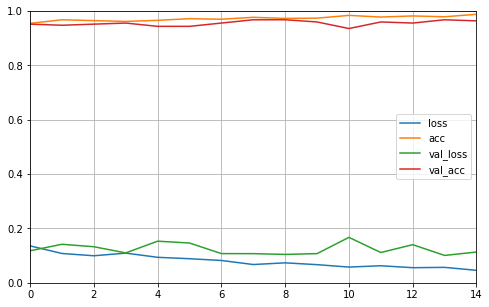

<Figure size 576x432 with 0 Axes>

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


figure = plt.gcf() 
figure.set_size_inches(8, 6) 
#plt.savefig('filename.png', bbox_inches='tight')
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [45]:
model.save("model_v3.h5")

In [46]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 3ms/sample - loss: 0.0586 - acc: 0.9783
[0.05859808197271996, 0.9782609]


### Accuracy : 97.83%

In [47]:
new=test_data[:5]

In [48]:
y_pred = model.predict_classes(new)

print(y_pred)
print(label_dict)

[[0]
 [1]
 [0]
 [1]
 [1]]
{'with mask': 0, 'without mask': 1}


AxesImage(54,36;334.8x217.44)


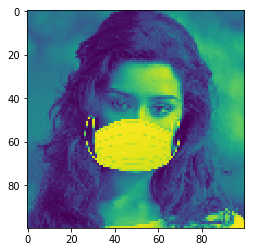

In [49]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


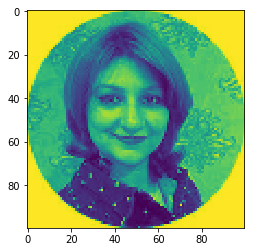

In [50]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


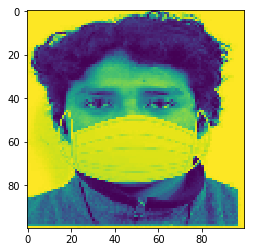

In [51]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


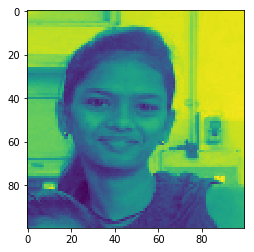

In [52]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


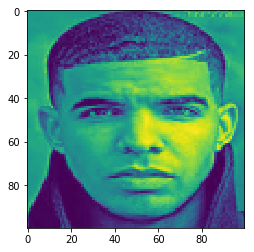

In [53]:
print(plt.imshow(test_data[4].reshape(100,100)))